# 771768 - Programming for Artificial Intelligence and Data Science

# Customer Data Pre-processing

In [1]:
#Importing the required libraries
import csv #for data preprocessing
import json #to read and write json files
import pandas as pd #for data preprocessing
import seaborn as sns #For visualization
import datetime as datetime #for date object creation
import matplotlib.pyplot as plt #For visualization

In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Data Processing

# 1.
The function in the immediate next cell returns a list of dictionaries where every line is a dictionary of column headers as keys and the cell row at the index of each header as the corresponding value. This is derived using the csv library and specifically the DictReader method

In [3]:
# read the data from csv file
lines = []
f = open('acw_user_data.csv', 'r') 
reader = csv.DictReader(f)
for line in reader:
        lines.append(line)


# 2.
The next couple of cells aim to achieve the organization of our customer data with nested srtructures and the data details in their appropriate type. The output of this task is an organized list of customers and their data.

The series of cells below contain the code to convert our data back into its rich structure. i.e to convert all flat structures into nested structures.  This requires the creation of dictionaries within our original structure. The dictionaries to be created are notably:

a. Vehicle - consists of make, model, year, and type

b. Credit Card - consists of start date, end date, number, security code, and
IBAN.

c. Address - consists of the main address, city, and postcode


The data in our dataset is a mixture of different character values including numerical, alphabetical and alaphanumeric values. However, they are all in string type format as obtained from our file. It is important to cast our data to their appropriate types for further processing. 

The function directly below attempts to achieve the casting. I have determined and  compiled a list of numeric data keys to be casted to Integers by inspecting the data.
The function will return a list of every dictionary with numeric values in int type format.

In [4]:
#define a function to cast all numeric data to the int type
def cast_data(keys, row): #arguments required are a list of keys and a dictionary
    for key in keys: #for key in list of keys
    #cast numerical data to int or float data type
        try:
            row[key]=int(float(row[key])) 
        except ValueError: #process ValueError only
            print('Sorry! you have missing values')
    return row #return dictionary
    
numeric_data = ['Age (Years)', 'Distance Commuted to Work (miles)', 'Yearly Pension (Â£)', 'Yearly Salary (Â£)', 'Dependants', 'Credit Card Number', 'Credit Card CVV','Vehicle Year']

for line in lines: #for every customer on list 'lines'
    cast_data(numeric_data, line)


Sorry! you have missing values
Sorry! you have missing values
Sorry! you have missing values
Sorry! you have missing values
Sorry! you have missing values
Sorry! you have missing values
Sorry! you have missing values
Sorry! you have missing values
Sorry! you have missing values
Sorry! you have missing values
Sorry! you have missing values
Sorry! you have missing values
Sorry! you have missing values
Sorry! you have missing values
Sorry! you have missing values
Sorry! you have missing values
Sorry! you have missing values
Sorry! you have missing values
Sorry! you have missing values


In [5]:
for line in lines:
    headers = [k for k, v in line.items()]#inspect csv headers to determine required data and their indices for the dictionaries
print(headers)

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (Â£)', 'Retired', 'Yearly Salary (Â£)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']


In [6]:
def populate_dict(new_dict, keys, row): #arguments required are an appropriate variable name, a list of dictionary keys and a dictionary 
    new_dict = {} #create an empty dictionary
    for key in keys:
        new_dict[key] = row[key]#populate new dictionary
    return new_dict #return new dictionary
#define function to remove items in a list from a dictionary. required to sort the order of items in the dictionary and to remove nested data
def to_pop(required, row): #arguments are a list of keys to be deleted and a dictionary
    for i in required: #for key in list
         row.pop(i) #delete key from dictionary
    return row #return the row

for line in lines:      

    #create the lists of required data for the dictionaries to be nested
    Vehicle_required = ['Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']
    Credit_card_required = ['Credit Card Start Date', 'Credit Card Expiry Date',  'Credit Card Number', 'Credit Card CVV', 'Bank IBAN'] 
    Address_required = ['Address Street', 'Address City', 'Address Postcode']
    
    
    #populate the dictionary Vehicle with required data; Vehicle make, Vehicle model, Vehicle Year and Vehicle type
    Vehicle = populate_dict('Vehicle', Vehicle_required, line) #call function populate_dict 
    
    #populate the dictionary Credit_card with required data; Credit Card Start Date, Credit Card Expiry Date, Credit Card Number, Credit Card CVV
    Credit_card = populate_dict('Vehicle', Credit_card_required, line) #call function populate_dict
    
    #populate the dictionary Address with required data; Address Street, Address City, Address Postcode  
    Address = populate_dict('Vehicle', Address_required, line) #call function populate_dict
    
    #create a list of items to reorder to move first name and last name to  first and second item indices
    re_order = ['Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Dependants']
    re_enter = populate_dict('re_enter', re_order, line) #store items to be removed and added back in the dictionary
                                                        #call function populate_dict
    
    
    to_pop(re_order, line) #remove all items before first name and last name
    
    #update lines with re_enter to return sorted dictionary items.
    line.update(re_enter)

    #updating original dictionary with nested dictionaries
    line['Address'] = Address
    line['Credit_card']=Credit_card
    line['Vehicle']= Vehicle 
    
    
    print(line['Address'], line['Credit_card'], line['Vehicle']) #print nested dictionaries
    
        

{'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ'} {'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': 676373692463, 'Credit Card CVV': 875, 'Bank IBAN': 'GB62PQKB71416034141571'} {'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': 2009, 'Vehicle Type': 'Pickup'}
{'Address Street': '00 Wheeler wells', 'Address City': 'Chapmanton', 'Address Postcode': 'L2 7BT'} {'Credit Card Start Date': '08/12', 'Credit Card Expiry Date': '11/26', 'Credit Card Number': 4529436854129855, 'Credit Card CVV': 583, 'Bank IBAN': 'GB37UMCO54540228728019'} {'Vehicle Make': 'Nissan', 'Vehicle Model': 'ATS', 'Vehicle Year': 1996, 'Vehicle Type': 'Coupe'}
{'Address Street': 'Studio 33K Joel walk', 'Address City': 'Randallborough', 'Address Postcode': 'ME3N 1GH'} {'Credit Card Start Date': '11/19', 'Credit Card Expiry Date': '07/27', 'Credit Card Number': 4091726363083888640, 'Credit Card CVV': 422, 'Bank

{'Address Street': '5 Brown valleys', 'Address City': 'South Francesca', 'Address Postcode': 'G2S 2EL'} {'Credit Card Start Date': '11/11', 'Credit Card Expiry Date': '03/13', 'Credit Card Number': 5379669297061792, 'Credit Card CVV': 596, 'Bank IBAN': 'GB43OTOQ21719538186487'} {'Vehicle Make': 'Mercedes-Benz', 'Vehicle Model': 'Grand Marquis', 'Vehicle Year': 2009, 'Vehicle Type': 'Hatchback'}
{'Address Street': '173 Dunn route', 'Address City': 'Port Brendaview', 'Address Postcode': 'L6D 9ZG'} {'Credit Card Start Date': '12/11', 'Credit Card Expiry Date': '03/25', 'Credit Card Number': 3521658101452562, 'Credit Card CVV': 971, 'Bank IBAN': 'GB13NTRC84226793587524'} {'Vehicle Make': 'Ferrari', 'Vehicle Model': 'Sequoia', 'Vehicle Year': 2001, 'Vehicle Type': 'Hatchback'}
{'Address Street': '7 Lauren path', 'Address City': 'Port Paulineside', 'Address Postcode': 'WA4 3PW'} {'Credit Card Start Date': '05/15', 'Credit Card Expiry Date': '01/24', 'Credit Card Number': 2232638464502932, 'C

{'Address Street': 'Studio 59 Owen river', 'Address City': 'Joelfurt', 'Address Postcode': 'L8J 5HW'} {'Credit Card Start Date': '06/13', 'Credit Card Expiry Date': '11/18', 'Credit Card Number': 374681439124103, 'Credit Card CVV': 215, 'Bank IBAN': 'GB97QMVN80439333893894'} {'Vehicle Make': 'Chrysler', 'Vehicle Model': 'S80', 'Vehicle Year': 2007, 'Vehicle Type': 'SUV'}
{'Address Street': 'Studio 81d Catherine coves', 'Address City': 'Lake Paulborough', 'Address Postcode': 'KY6B 4RN'} {'Credit Card Start Date': '01/12', 'Credit Card Expiry Date': '04/28', 'Credit Card Number': 180028531300237, 'Credit Card CVV': 56, 'Bank IBAN': 'GB90ZJPJ54279800785719'} {'Vehicle Make': 'Ford', 'Vehicle Model': 'Tahoe', 'Vehicle Year': 1996, 'Vehicle Type': 'SUV'}
{'Address Street': 'Studio 94K Lisa terrace', 'Address City': 'Debrahaven', 'Address Postcode': 'DH46 3XF'} {'Credit Card Start Date': '12/14', 'Credit Card Expiry Date': '11/16', 'Credit Card Number': 4247594002472139, 'Credit Card CVV': 1

{'Address Street': '93 Georgina center', 'Address City': 'Morrisstad', 'Address Postcode': 'N90 8RD'} {'Credit Card Start Date': '11/11', 'Credit Card Expiry Date': '12/14', 'Credit Card Number': 3566522618594249, 'Credit Card CVV': 750, 'Bank IBAN': 'GB02EXQV62153741338312'} {'Vehicle Make': 'Nissan', 'Vehicle Model': 'Outlander Sport', 'Vehicle Year': 2009, 'Vehicle Type': 'SUV'}
{'Address Street': '43 Owen estates', 'Address City': 'Port Dennis', 'Address Postcode': 'W4W 7PL'} {'Credit Card Start Date': '11/12', 'Credit Card Expiry Date': '09/27', 'Credit Card Number': 502048825637, 'Credit Card CVV': 968, 'Bank IBAN': 'GB42THHK79795752651901'} {'Vehicle Make': 'Ford', 'Vehicle Model': 'Vantage', 'Vehicle Year': 2009, 'Vehicle Type': 'Convertible, Coupe'}
{'Address Street': 'Flat 1 Johnson loop', 'Address City': 'Lake Samantha', 'Address Postcode': 'LN1H 2JN'} {'Credit Card Start Date': '06/17', 'Credit Card Expiry Date': '03/21', 'Credit Card Number': 4556534924304493056, 'Credit C

In [7]:
for line in lines:             
    to_pop(Vehicle_required, line ) #remove unested vehicle details
    to_pop(Credit_card_required, line ) #remove unested Credit_card details
    to_pop(Address_required, line) #remove unested Address details

   
    print(line) #print out updated dictionaries for our entire list
   
    

{'First Name': 'Kieran', 'Last Name': 'Wilson', 'Marital Status': 'married or civil partner', 'Yearly Pension (Â£)': 7257, 'Retired': 'True', 'Yearly Salary (Â£)': 72838, 'Sex': 'Male', 'Age (Years)': 89, 'Distance Commuted to Work (miles)': 0, 'Employer Company': 'N/A', 'Dependants': 3, 'Address': {'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ'}, 'Credit_card': {'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': 676373692463, 'Credit Card CVV': 875, 'Bank IBAN': 'GB62PQKB71416034141571'}, 'Vehicle': {'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': 2009, 'Vehicle Type': 'Pickup'}}
{'First Name': 'Jonathan', 'Last Name': 'Thomas', 'Marital Status': 'married or civil partner', 'Yearly Pension (Â£)': 0, 'Retired': 'False', 'Yearly Salary (Â£)': 54016, 'Sex': 'Male', 'Age (Years)': 46, 'Distance Commuted to Work (miles)': 13, 'Employer Company': 'Begum-Williams', 'Dependants'

{'First Name': 'Joseph', 'Last Name': 'Begum', 'Marital Status': 'widowed', 'Yearly Pension (Â£)': 0, 'Retired': 'False', 'Yearly Salary (Â£)': 54470, 'Sex': 'Male', 'Age (Years)': 49, 'Distance Commuted to Work (miles)': 13, 'Employer Company': 'Mills Group', 'Dependants': 2, 'Address': {'Address Street': '21 Phillips plains', 'Address City': 'South Lewis', 'Address Postcode': 'M3 5LS'}, 'Credit_card': {'Credit Card Start Date': '04/14', 'Credit Card Expiry Date': '10/14', 'Credit Card Number': 5306505321837567, 'Credit Card CVV': 987, 'Bank IBAN': 'GB27TZZI73782123631006'}, 'Vehicle': {'Vehicle Make': 'Jaguar', 'Vehicle Model': 'Sierra (Classic) 1500 Regular Cab', 'Vehicle Year': 2010, 'Vehicle Type': 'Sedan'}}
{'First Name': 'Karen', 'Last Name': 'Tucker', 'Marital Status': 'married or civil partner', 'Yearly Pension (Â£)': 0, 'Retired': 'False', 'Yearly Salary (Â£)': 35881, 'Sex': 'Female', 'Age (Years)': 46, 'Distance Commuted to Work (miles)': 10, 'Employer Company': 'Birch-Water

# 3.
The cell below handles the correction of empty cells in the Dependants column. The cells are assigned a value of zero and a list of the indices of rows where this problem occurs is generated

In [8]:
for line in lines:#for every user in list lines
    if line['Dependants']== '': #if line at the column 'Dependants' is empty
        line['Dependants'] = 0 #replace with 0
    
 
    
problematic_rows = [i for i, line in enumerate(lines) if line['Dependants'] == 0] #determine the indices of problematic rows and store them in a list
print('problematic rows for dependants : {}'.format(problematic_rows)) #print list of problematic rows                                    

problematic rows for dependants : [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


# 4.
The next two cell aims to create a file containing an organized list of our customers and their data.
The cell directly below defines a function that accepts data and a file name and returns a json file.

In [9]:
#define a function to write to a json file
def write_json(data, filename):
    with open(filename, 'w') as f:
            return json.dump(data, f, indent=4) 

In [10]:
write_json(lines, 'Processed.json') #write processed customer data to processed.json
print(lines) #print the output to processed.json

[{'First Name': 'Kieran', 'Last Name': 'Wilson', 'Marital Status': 'married or civil partner', 'Yearly Pension (Â£)': 7257, 'Retired': 'True', 'Yearly Salary (Â£)': 72838, 'Sex': 'Male', 'Age (Years)': 89, 'Distance Commuted to Work (miles)': 0, 'Employer Company': 'N/A', 'Dependants': 3, 'Address': {'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ'}, 'Credit_card': {'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': 676373692463, 'Credit Card CVV': 875, 'Bank IBAN': 'GB62PQKB71416034141571'}, 'Vehicle': {'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': 2009, 'Vehicle Type': 'Pickup'}}, {'First Name': 'Jonathan', 'Last Name': 'Thomas', 'Marital Status': 'married or civil partner', 'Yearly Pension (Â£)': 0, 'Retired': 'False', 'Yearly Salary (Â£)': 54016, 'Sex': 'Male', 'Age (Years)': 46, 'Distance Commuted to Work (miles)': 13, 'Employer Company': 'Begum-Williams', 'Dependant

# 5.
The next cell when executed generates two file outputs Retired.json and Employed.json. The contents were determined by the retired field and the employer field in the csv file respectively.

In [11]:
retired = [] #create empty list
employed =[] #create empty list
for line in lines:
    if line['Retired']== 'True': #check for retired customers
        line['Retired'] = True #assign bool if true
        retired.append(line) #append customer data to empty list if retired
    elif line['Retired'] == 'false': 
        line['Retired'] = False #assign bool if false
    elif line["Employer Company"] != 'N/A':#check for employed customers
        employed.append(line )#append customer data to empty list if employed

write_json(retired, 'retired.json') #write retired customer data to Retired.json
write_json(retired, 'employed.json') #write Employed customer data to Employed.json

print(retired) #print the output to Retired.json
print(employed) #print the output to employed.json

[{'First Name': 'Kieran', 'Last Name': 'Wilson', 'Marital Status': 'married or civil partner', 'Yearly Pension (Â£)': 7257, 'Retired': True, 'Yearly Salary (Â£)': 72838, 'Sex': 'Male', 'Age (Years)': 89, 'Distance Commuted to Work (miles)': 0, 'Employer Company': 'N/A', 'Dependants': 3, 'Address': {'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ'}, 'Credit_card': {'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': 676373692463, 'Credit Card CVV': 875, 'Bank IBAN': 'GB62PQKB71416034141571'}, 'Vehicle': {'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': 2009, 'Vehicle Type': 'Pickup'}}, {'First Name': 'Clive', 'Last Name': 'Evans', 'Marital Status': 'single', 'Yearly Pension (Â£)': 28075, 'Retired': True, 'Yearly Salary (Â£)': 27964, 'Sex': 'Male', 'Age (Years)': 67, 'Distance Commuted to Work (miles)': 0, 'Employer Company': 'N/A', 'Dependants': 1, 'Address': {'Address Street'

[{'First Name': 'Jonathan', 'Last Name': 'Thomas', 'Marital Status': 'married or civil partner', 'Yearly Pension (Â£)': 0, 'Retired': 'False', 'Yearly Salary (Â£)': 54016, 'Sex': 'Male', 'Age (Years)': 46, 'Distance Commuted to Work (miles)': 13, 'Employer Company': 'Begum-Williams', 'Dependants': 1, 'Address': {'Address Street': '00 Wheeler wells', 'Address City': 'Chapmanton', 'Address Postcode': 'L2 7BT'}, 'Credit_card': {'Credit Card Start Date': '08/12', 'Credit Card Expiry Date': '11/26', 'Credit Card Number': 4529436854129855, 'Credit Card CVV': 583, 'Bank IBAN': 'GB37UMCO54540228728019'}, 'Vehicle': {'Vehicle Make': 'Nissan', 'Vehicle Model': 'ATS', 'Vehicle Year': 1996, 'Vehicle Type': 'Coupe'}}, {'First Name': 'Antony', 'Last Name': 'Jones', 'Marital Status': 'married or civil partner', 'Yearly Pension (Â£)': 0, 'Retired': 'False', 'Yearly Salary (Â£)': 68049, 'Sex': 'Male', 'Age (Years)': 22, 'Distance Commuted to Work (miles)': 16, 'Employer Company': 'Hill-Wright', 'Depend

# 6. 
The next couple of cells aim to compile a list of customers with credit card issues.
The final output is a file containing a list of customers with more than 10 years between their credit card start and end dates

The cell below contains a function which accepts a single row from our list of customers and returns the difference in years between their credit card start dates and expiry dates.

The  function converts a date string in mm/yy format and casts it into a date object using the datetime module.(datetime.date(year, month, day))

It is important that we convert out date data to enable accurate calculations in real time. 



In [12]:
def remove_card(row):#define function to cast date string to datetime object and calculate the difference in years
    start_date = row['Credit_card']['Credit Card Start Date'].split('/') #split string using inbuilt split function
    expiry_date = row['Credit_card']['Credit Card Expiry Date'].split('/') #split string using inbuilt split function
    
    m = int(start_date[0]) #cast month value of start date to int 
    y= int(f"20{start_date[1]}") #convert year to 4 character format, then cast to int
    d = 1 #consider value of day as 1st
    
    m2 = int(expiry_date[0])#cast month value of expiry date to int
    y2= int(f"20{expiry_date[1]}") #convert year to 4 character format, then cast to int
    d2 = 1 #consider value of day as 1st
    
    real_start_date = datetime.date(y, m, d) #convert start date to date object
    real_expiry_date = datetime.date(y2, m2, d2) #convert expiry date to date object
    date_diff = real_expiry_date - real_start_date #calculate difference in number of days
    date_diff_years = date_diff.days / 365 #divide by 365 to get number of years
    return date_diff_years #return the difference in years

The cell below contains code which generates a file output containing a list of customers who have issues with their credit card. Customers who fall into this category are determined by the difference between their credit card start dates and expiry dates

In [13]:
remove_ccard = []
for line in lines: #for every customer on list lines
    years = remove_card(line) #call function 'remove_card'
    if  years > 10: #if year difference is greater than 10
        remove_ccard.append(line) # append customer to to list remove_ccard
        
write_json(remove_ccard, 'remove_ccard.json') #write customer data with card issues to remove_ccard.json        

print(remove_ccard) #print the output to remove_ccard.json       

[{'First Name': 'Jonathan', 'Last Name': 'Thomas', 'Marital Status': 'married or civil partner', 'Yearly Pension (Â£)': 0, 'Retired': 'False', 'Yearly Salary (Â£)': 54016, 'Sex': 'Male', 'Age (Years)': 46, 'Distance Commuted to Work (miles)': 13, 'Employer Company': 'Begum-Williams', 'Dependants': 1, 'Address': {'Address Street': '00 Wheeler wells', 'Address City': 'Chapmanton', 'Address Postcode': 'L2 7BT'}, 'Credit_card': {'Credit Card Start Date': '08/12', 'Credit Card Expiry Date': '11/26', 'Credit Card Number': 4529436854129855, 'Credit Card CVV': 583, 'Bank IBAN': 'GB37UMCO54540228728019'}, 'Vehicle': {'Vehicle Make': 'Nissan', 'Vehicle Model': 'ATS', 'Vehicle Year': 1996, 'Vehicle Type': 'Coupe'}}, {'First Name': 'Julian', 'Last Name': 'Potter', 'Marital Status': 'single', 'Yearly Pension (Â£)': 0, 'Retired': 'False', 'Yearly Salary (Â£)': 96645, 'Sex': 'Male', 'Age (Years)': 43, 'Distance Commuted to Work (miles)': 20, 'Employer Company': 'Clark Group', 'Dependants': 3, 'Addres

In [14]:
#closing the file
f.close()

# 7.
The cells below aim to rank customers by a metric - salary commute which is calculted by measuring their salary against the distance they commute to work. The final output of this task is a json file with the customers ranked in ascending order by the new key salary commute.  

In [15]:
def read_json(file_name):#define a function to read a json file
    with open(file_name, 'r') as f:
        return json.load(f)

The cell below accepts a row from a csv file and returns the value of a customer's salary/ the distance they commute to work.

In [16]:
def Salary_Commute(row):#define a function to calculate salary_commute
    if row['Distance Commuted to Work (miles)'] <= 1: #check if commute is less than 1 mile
        salarycommute =  row['Yearly Salary (Â£)'] #calculate salary as salary_commute if above is true
    else:#if commute condition is otherwise
        #calculate salary per distance of commute
        salarycommute = row['Yearly Salary (Â£)'] /row['Distance Commuted to Work (miles)']
    return salarycommute #return value of salary commute


The cell directly below creates a new key and assigns the salary_commute value to the key for every customer on our processed list.

In [17]:
processed = read_json('Processed.json') #read in processed.json file
for line in processed:
    line['Salary_Commute'] = Salary_Commute(line) #assign value of salary commute to key and add to dictionary.
    print(line['Salary_Commute'])

72838
4155.076923076923
4253.0625
4807.210526315789
3689.2
3810.0
4832.25
27964
4228.866666666667
66157
3634.818181818182
3437.4285714285716
4897.4
3586.777777777778
59891
4600.823529411765
4831.166666666667
3486.3333333333335
3675.6363636363635
4158.466666666666
4617.444444444444
4039.4545454545455
4695.470588235294
4472.823529411765
4617.588235294118
3786.6
4415.9375
4644.411764705882
4862.315789473684
4933.894736842105
4197.857142857143
3279.8571428571427
80297
4850.444444444444
70109
57953
3905.3333333333335
81220
4257.133333333333
3776.3333333333335
3521.714285714286
3367.6666666666665
4844.1
4777.35294117647
3310.5
4325.666666666667
59223
3490.222222222222
3601.0
4719.0
4838.777777777777
3475.5714285714284
97406
26452
3449.0
3816.4545454545455
4418.64705882353
92899
59872
4138.142857142857
3982.714285714286
62907
4524.764705882353
4491.133333333333
4025.3636363636365
3587.818181818182
4720.894736842105
4042.909090909091
90989
4775.789473684211
4687.764705882353
4390.714285714285


The next cell executes the sorting of the customer list in our processed file and writing the sorted list to the commute.json file

In [18]:
new_processed = sorted(processed, key=lambda x: x['Salary_Commute']) #sort records in ascending order by Salary_Commute  
write_json(new_processed, 'commute.json')#write new dictionary output to commute.json  

print(new_processed) #print the output to commute.json

[{'First Name': 'Sarah', 'Last Name': 'Crawford', 'Marital Status': 'married or civil partner', 'Yearly Pension (Â£)': 0, 'Retired': 'False', 'Yearly Salary (Â£)': 18872, 'Sex': 'Female', 'Age (Years)': 66, 'Distance Commuted to Work (miles)': 6, 'Employer Company': 'White Ltd', 'Dependants': 2, 'Address': {'Address Street': '75 Sian point', 'Address City': 'Lucasland', 'Address Postcode': 'GU4E 9TX'}, 'Credit_card': {'Credit Card Start Date': '07/20', 'Credit Card Expiry Date': '05/22', 'Credit Card Number': 5438238397295079, 'Credit Card CVV': 3995, 'Bank IBAN': 'GB16MPYK68993249293405'}, 'Vehicle': {'Vehicle Make': 'Mitsubishi', 'Vehicle Model': 'Express 2500 Passenger', 'Vehicle Year': 2013, 'Vehicle Type': 'SUV'}, 'Salary_Commute': 3145.3333333333335}, {'First Name': 'Jonathan', 'Last Name': 'Doyle', 'Marital Status': 'married or civil partner', 'Yearly Pension (Â£)': 0, 'Retired': 'False', 'Yearly Salary (Â£)': 18908, 'Sex': 'Male', 'Age (Years)': 67, 'Distance Commuted to Work (

# Data Visualisation

Using Pandas and Seaborn, the next series of cells are calculations and plots of the customers data for the client's visualisation and understanding.
The immediate cell below reads in the file and allows us to inspect the csv columns

In [19]:
customers = pd.read_csv('acw_user_data.csv') #Read in the csv file using pandas
customers.columns #inspect the dataframe headers

Index(['Address Street', 'Address City', 'Address Postcode', 'Age (Years)',
       'Distance Commuted to Work (miles)', 'Employer Company',
       'Credit Card Start Date', 'Credit Card Expiry Date',
       'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name',
       'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (£)',
       'Retired', 'Yearly Salary (£)', 'Sex', 'Vehicle Make', 'Vehicle Model',
       'Vehicle Year', 'Vehicle Type'],
      dtype='object')

# 1. 
The cell directly below obtains the Data Series for Salary, and Age, and calculates the average salary and the median age of the customers

In [20]:
Salary = customers['Yearly Pension (£)']# access Data Series object
Age = customers['Age (Years)']# access Data Series object

avg_salary = Salary.mean()#calculate the average salary of the customers

Median_age = Age.median()#calculate the median age of the customer distribution.

# 2.
The next series of cells perform univariate plots of the following data attributes:

a. Age, with bin_width of 5.

b. Dependents.

c. Age, conditioned on Marital Status 


Text(0.5, 1.0, 'Customer ages')

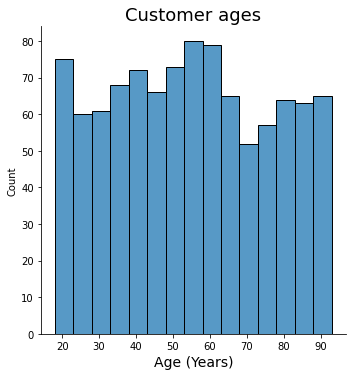

In [21]:
#display displot
Age_univariate = sns.displot(Age, binwidth=5) #univariate plot of user ages.
Age_univariate.set_axis_labels('Age (Years)', size=14)
plt.title('Customer ages', size=18)

fig 1. A univariate plot of the ages of customers

Text(0.5, 1.0, 'Customer Dependants')

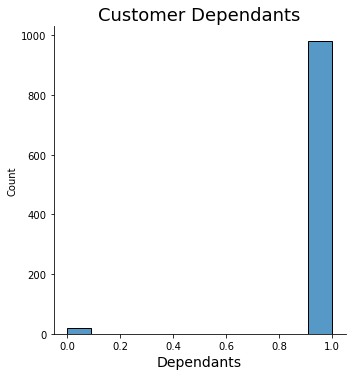

In [22]:
Dependants = customers['Dependants'] #access Data Series object
#display displot
Dependants_univariate = sns.displot(Dependants.notnull()) #univariate plot of user dependants
Dependants_univariate.set_axis_labels('Dependants', size=14)
plt.title('Customer Dependants', size=18)

fig 1.1 A univariate plot of the number of dependants

Text(0.5, 1.0, 'Ages categorized by Marital status')

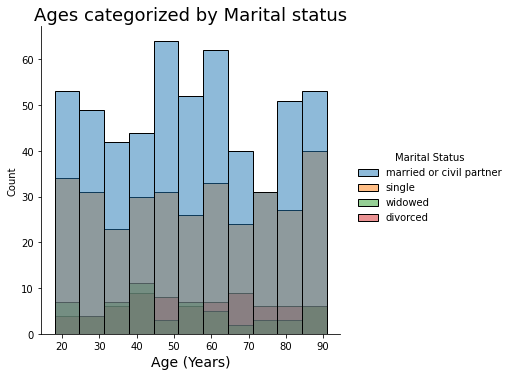

In [23]:
#display displot
age_marital_univariate = sns.displot(customers, x = Age , hue='Marital Status')
age_marital_univariate.set_axis_labels('Age (Years)', size=14)
plt.title('Ages categorized by Marital status', size=18)

fig 1.2 A univariate plot of The ages of customers compared by their marital status

# 3.
The next series of cells perform multivariate plots with the following data attributes:
a. Commuted distance against salary.
b. Age against Salary
c. Age against Salary conditioned by Dependants 

Text(0.5, 1.0, 'Distance commuted vs Salary')

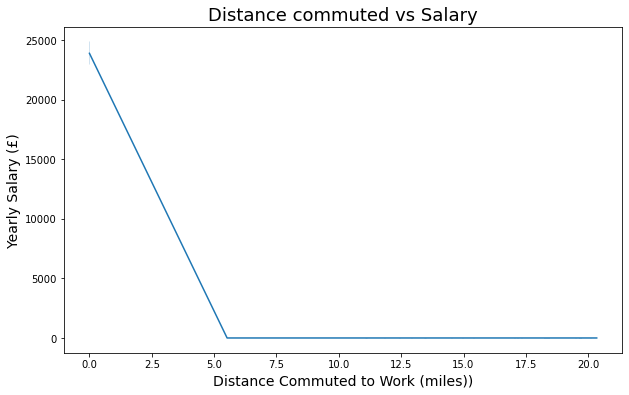

In [24]:
Commute = customers['Distance Commuted to Work (miles)'] #access Data Series object
#define figure size
plt.figure(figsize=(10,6))
#display lineplot
Dist_salary = sns.lineplot(data= customers, x= Commute, y= Salary)
plt.xlabel('Distance Commuted to Work (miles))', size=14)
plt.ylabel('Yearly Salary (£)', size=14)
plt.title('Distance commuted vs Salary', size=18)

fig 2. A multivariate plot of commuted distance against salary

Text(0.5, 1.0, 'Age vs Salary')

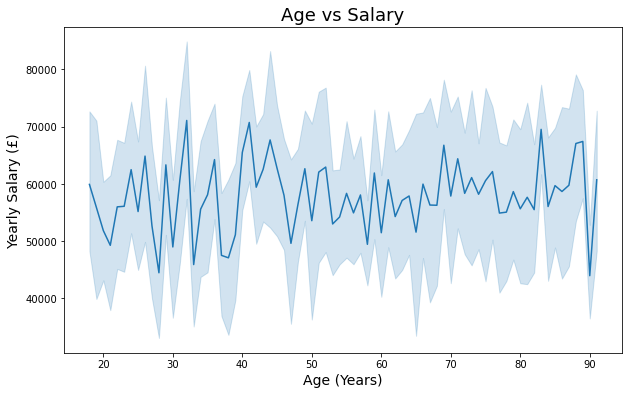

In [25]:
#define figure size
plt.figure(figsize=(10,6))
#display lineplot
age_salary1 = sns.lineplot(data= customers, x= 'Age (Years)', y= 'Yearly Salary (£)')
plt.xlabel('Age (Years)', size=14)
plt.ylabel('Yearly Salary (£)', size=14)
plt.title('Age vs Salary', size=18)

fig 2.1 A multivariate plot of customers age against their salary

Text(0.5, 1.0, 'Age vs Salary categorized by Dependants')

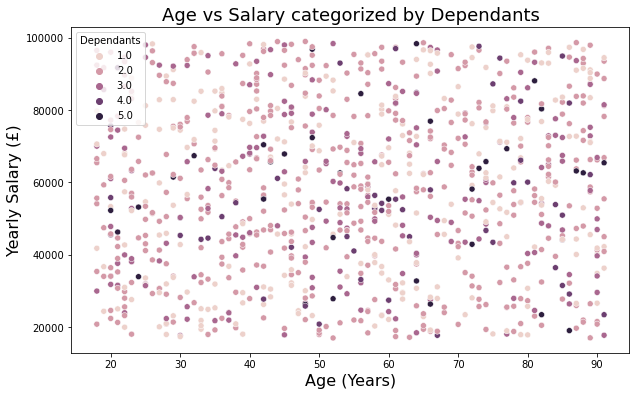

In [26]:
#define figure size
plt.figure(figsize=(10,6))
#display scatterplot
age_salary2 = sns.scatterplot(data= customers, x= 'Age (Years)', y= 'Yearly Salary (£)', hue= 'Dependants')
plt.xlabel('Age (Years)', size=16)
plt.ylabel('Yearly Salary (£)', size=16)
plt.title('Age vs Salary categorized by Dependants', size=18)

fig 2.2 A multivariate plot of customers ages against their salary compared with the number of dependants

# 4.
The notebook cell below defines a function which will accept a list if file paths and a list of figures, save the figures and return a statement indicating that the function was successful.

In [27]:
#Define a function to save plots as images
def save_plot(file_paths, figures): #accepts list of file paths and a list of figures
    figs_to_save = {} #create an empty dictionary
    for i,j in zip(file_paths, figures):
        figs_to_save[i]= j #assign file path as key and figure as value and populate figs_to_save
    for file_path, figure in figs_to_save.items(): #for items in figs_to_save
        try:
            figure.savefig(file_path) #save figure to file path
        except AttributeError: #process attribute error if figure is not a FacetGrid object
            figure.get_figure().savefig(file_path) #attempt saving again
            
    return 'The plots have been saved' #confirm completion
        
paths = ["./Age_histogram.png", "./Dependants_histogram", "./age_marital_sts.png", "./Dist_salary.png", "./age_salary1.png", "./age_salary2.png"]
plots = [Age_univariate, Dependants_univariate,age_marital_univariate, Dist_salary, age_salary1, age_salary2  ]

save_plot(paths, plots) #call function 'Save_plot'

'The plots have been saved'